<a href="https://colab.research.google.com/github/bensoudaneOsama/projet_Deep_learning/blob/main/ELMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Need to run this only once, and then restart runtime
# !pip install tensorflow==1.15
# !pip install "tensorflow_hub>=0.6.0"
# !pip3 install tensorflow_text==1.15

In [ ]:
!nvidia-smi

Sat Oct 30 09:45:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Preprocessing and preparing dataset before applying elmo embeddings


In [ ]:
"""
Extracting the preprocessed data from the pkl files 
"""
import pickle

beth_tokens, beth_concepts = pickle.load(open('beth.pkl', 'rb'))
partners_tokens, partners_concepts = pickle.load(open('partners.pkl', 'rb'))
test_tokens, test_concepts = pickle.load(open('text.pkl', 'rb'))

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset = {}
val_dataset = {}
test_dataset = {}

x = beth_tokens + partners_tokens
y = beth_concepts + partners_concepts

train_dataset['sentences'], val_dataset['sentences'], train_dataset['tags'], val_dataset['tags'] = train_test_split(x,y,test_size=0.1)

test_dataset['sentences'] = test_tokens
test_dataset['tags'] = test_concepts

for ele in train_dataset:
  print(f'{ele}:- Training {train_dataset[ele]}')
  print(f'{ele}:- Validation {val_dataset[ele]}')

sentences:- Training [['She', 'is', 'to', 'contact', 'Dr.', 'Warm', '&apos;s', 'office', 'to', 'schedule', 'a', 'follow', 'up', 'appointment', '.'], ['Abd', ':', 'Soft', ',', 'NT/NT', '+', 'BS'], ['Cranial', 'nerves', 'II', 'through', 'XII', 'are', 'intact', '.'], ['Pancreatic', 'carcinoma', '.'], ['No', 'known', 'drug', 'allergies', '.'], ['2015-06-10'], ['Discharge', 'Diagnosis', ':'], ['He', 'underwent', 'a', 'PTC', 'stenting', 'of', 'an', 'RCA', 'with', 'a', 'Vision', 'stent', ',', '3', 'x', '18', '.'], ['Nystatin', 'powder'], ['While', 'on', 'the', 'floor', ',', 'he', 'continued', 'to', 'be', 'diuresed', '.'], ['STA', 'BODEJOVE', ',', 'M.D.', ''], ['2018-10-25', '11:15', 'AM', 'BLOOD', 'WBC', '-', '18.3', '*#', 'RBC', '-', '3.42', '*', 'Hgb', '-', '10.9', '*', 'Hct', '-', '31.6', '*', 'MCV', '-', '92', 'MCH', '-', '31.7', 'MCHC', '-', '34.4', 'RDW', '-', '13.3', 'Plt', 'Ct', '-', '134', '*'], ['The', 'patient', '&apos;s', 'postoperative', 'Hct', 'was', '34', '.'], ['The', 'patient

In [ ]:
Sentences=[]

sentence_dic=set()
tag_dic=set()
for i in range(len(x)):
  temp=[]
  for j in range(len(x[i])):
    if y[i][j]=='':
      y[i][j]='O'
    sentence_dic.add(x[i][j])
    tag_dic.add(y[i][j])
    temp.append((x[i][j],y[i][j]))
  Sentences.append(temp)

sentence_dic.add("PADDword")

n_words=len(sentence_dic)
n_tags=len(tag_dic)

print("Total distinct words in sentences are: ",len(sentence_dic))
print("Total distinct tags are: ",len(tag_dic),tag_dic)
print("Total sentences are: ",len(Sentences))

Total distinct words in sentences are:  15680
Total distinct tags are:  7 {'treatment', 'O', 'B-treatment', 'problem', 'B-problem', 'B-test', 'test'}
Total sentences are:  16414


In [ ]:
words2index = {w:i for i,w in enumerate(sentence_dic)}
tags2index = {t:i for i,t in enumerate(tag_dic)}

In [ ]:
import pandas as pd

data = {'Sentence #':[], 'Word': [], 'Tag': [], 'Word-id': [], 'Tag-id': [] }
for i in range(len(Sentences)):
  for j in range(len(Sentences[i])):
    data['Sentence #'].append(i+1)
    data['Word'].append(Sentences[i][j][0])
    data['Tag'].append(Sentences[i][j][1])
    data['Word-id'].append(words2index[Sentences[i][j][0]])
    data['Tag-id'].append(tags2index[Sentences[i][j][1]])

data = pd.DataFrame(data)

data.head()


,Sentence #,Word,Tag,Word-id,Tag-id
0,1,Admission,O,9174,1
1,1,Date,O,3552,1
2,1,:,O,13499,1
3,2,2017-06-13,O,3235,1
4,3,Discharge,O,6407,1


In [ ]:
# Groupby and collect columns
data_group = data.groupby(['Sentence #'],as_index=False)['Word', 'Tag', 'Word-id', 'Tag-id'].agg(lambda x: list(x))
# Visualise data
data_group.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Sentence #,Word,Tag,Word-id,Tag-id
0,1,"[Admission, Date, :]","[O, O, O]","[9174, 3552, 13499]","[1, 1, 1]"
1,2,[2017-06-13],[O],[3235],[1]
2,3,"[Discharge, Date, :]","[O, O, O]","[6407, 3552, 13499]","[1, 1, 1]"
3,4,[2017-06-17],[O],[5722],[1]
4,5,"[Date, of, Birth, :]","[O, O, O, O]","[3552, 2760, 3173, 13499]","[1, 1, 1, 1]"


In [ ]:
max_len=max([len(sentence) for sentence in x])
X = [[w[0] for w in s] for s in Sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)

In [ ]:
#from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
y = [[tags2index[w[1]] for w in s] for s in Sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index['O'])

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1)

print("Total sentences: ",len(new_X))
print("Sentences used for training: ",len(X_tr))
print("Sentences used for testing: ",len(X_te))

Total sentences:  16414
Sentences used for training:  14772
Sentences used for testing:  1642


#Getting ELMO embeddings from the sentences


In [ ]:
import tensorflow as tf1
print(tf1.__version__)

1.15.0


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import backend as K
sess = tf.Session()
K.set_session(sess)

In [ ]:
batch_size = 32
X_tr, X_val = X_tr[:int(int(len(X_tr)*0.9/batch_size)*batch_size)], X_tr[int(int(len(X_tr)*0.9/batch_size)*batch_size):(len(X_tr)//batch_size)*batch_size]
y_tr, y_val = y_tr[:int(int(len(y_tr)*0.9/batch_size)*batch_size)], y_tr[int(int(len(y_tr)*0.9/batch_size)*batch_size):(len(y_tr)//batch_size)*batch_size]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

print(len(X_tr),len(X_val))
print(len(y_tr),len(y_val))

13280 1472
13280 1472


In [ ]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [ ]:
def ElmoEmbedding(x):
    return elmo_model(inputs={"tokens": tf.squeeze(tf.cast(x, tf.string)),"sequence_len": tf.constant(batch_size*[max_len])},signature="tokens",as_dict=True)["elmo"]

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import add
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [ ]:
input_text = Input(shape=(max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
x = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(embedding)
x_rnn = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(x)
x = add([x, x_rnn])  # residual connection to the first biLSTM
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
tag_model = Model(input_text, out)
tag_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
tag_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 201)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (32, None, 1024)     0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (32, None, 1024)     6295552     lambda[0][0]                     
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (32, None, 1024)     6295552     bidirectional[0][0]              
______________________________________________________________________________________________

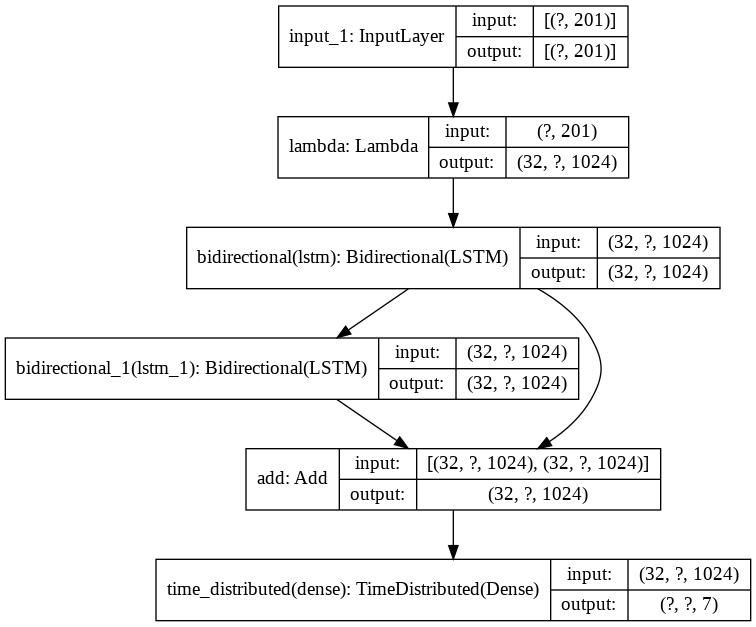

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(tag_model,'Elmo_tag.png',show_shapes= True)

In [ ]:
import numpy as np
history = tag_model.fit(np.array(X_tr), y_tr, validation_data=(np.array(X_val), y_val),batch_size=batch_size, epochs=1, verbose=1)

Train on 13280 samples, validate on 1472 samples
13280/13280 [==============================] - 2211s 166ms/sample - loss: 0.0105 - acc: 0.9964 - val_loss: 0.0096 - val_acc: 0.9969


#Calculating the metrics


In [ ]:
!pip install seqeval

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
X_test = X_te[:int(len(X_te)/batch_size)*batch_size]
test_pred = tag_model.predict(np.array(X_test), verbose=1)

1632/1632 [==============================] - 153s 94ms/sample


In [ ]:
idx2tag = {i: w for w, i in tags2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADDword", "O"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PADDword", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = test2label(y_te[:int(len(y_te)/batch_size)*batch_size])

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: problem seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: treatment seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: test seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


F1-score: 77.1%


In [ ]:
print(classification_report(test_labels, pred_labels))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: problem seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: treatment seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: test seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


              precision    recall  f1-score   support

         est       0.78      0.76      0.77       201
     problem       0.87      0.75      0.81       668
    reatment       0.59      0.76      0.67       221
      roblem       0.72      0.70      0.71       434
        test       0.89      0.73      0.80       537
   treatment       0.79      0.81      0.80       485

   micro avg       0.79      0.75      0.77      2546
   macro avg       0.77      0.75      0.76      2546
weighted avg       0.80      0.75      0.77      2546

